In [1]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

C:\Users\Srivinay Tummarakota\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Srivinay Tummarakota\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Srivinay Tummarakota\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Srivinay Tummarakota\anaconda3\lib\site-packages\ten

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

from time import strftime
import itertools

from IPython.display import display

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Constants

In [32]:
LABEL_NAMES = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
IMAGE_WIDTH = IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH*IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS
VALIDATION_SIZE = 10000
LOG_DIR = "tensorboard_cifar10_logs/"
NR_CLASSES = 10

# Cleaning the Data

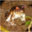

In [5]:
pic = array_to_img(x_train_all[0])
display(pic)

In [6]:
x_train_all, x_test = x_train_all/255.0, x_test/255.0
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)

In [7]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

# Creating the Model

In [8]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation="relu", name="ml_hidden1"), 
    Dense(units=64, activation="relu", name="ml_hidden2"), 
    Dense(units=16, activation="relu", name="ml_hidden3"), 
    Dense(units=10, activation="softmax", name="ml_output")
])
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ml_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
ml_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
ml_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
ml_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_2 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),
    Dense(units=128, activation="relu", name="ml2_hidden1"), 
    Dense(units=64, activation="relu", name="ml2_hidden2"), 
    Dense(units=16, activation="relu", name="ml2_hidden3"), 
    Dense(units=10, activation="softmax", name="ml2_output")
])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# TensorBoard

In [13]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H, %M")}'
    dir_path = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_path)
    except OSError as err:
        print(err.strerror)
    return TensorBoard(log_dir=dir_path)

In [27]:
model_1.fit(x_train, y_train, callbacks=[get_tensorboard("Model 1")], batch_size=1000, epochs=150, verbose=0,
           validation_data=(x_val, y_val))

In [14]:
model_2.fit(x_train, y_train, callbacks=[get_tensorboard("Model 2")], batch_size=1000, epochs=150, verbose=0,
           validation_data=(x_val, y_val))

# Predictions on Individual Images

In [24]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    predicted_result = model_2.predict_classes(test)
    actual_result = y_val[i]
    print(predicted_result, actual_result)

[6] [6]
[1] [9]
[9] [9]
[4] [4]
[1] [1]
[7] [1]
[6] [2]
[7] [7]
[8] [8]
[9] [3]


# Evaluation

In [27]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

10000/10000 [==============================] - 0s 40us/step
1.4170130353927612 0.4925999939441681


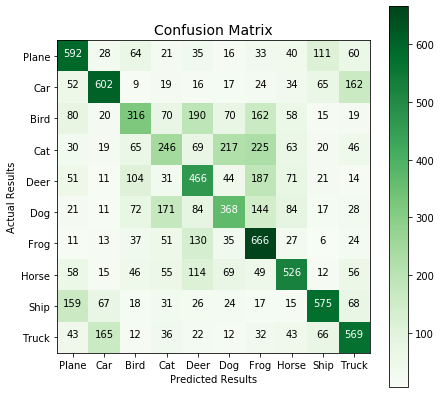

In [51]:
conf_matrix = confusion_matrix(y_test, model_2.predict_classes(x_test))

plt.figure(figsize=(7,7))
plt.title("Confusion Matrix", fontsize=14)
plt.ylabel("Actual Results")
plt.xlabel("Predicted Results")
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

for i,j in itertools.product(range(NR_CLASSES), range(NR_CLASSES)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment="center", color="white" if conf_matrix[i,j] > conf_matrix.max()//2 else "black")

plt.colorbar()

plt.show()

In [53]:
# True Positives
np.diag(conf_matrix)

array([592, 602, 316, 246, 466, 368, 666, 526, 575, 569], dtype=int64)

In [56]:
# Recall Score = True Pos/(True Pos + False Neg)
recall = np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)
print(recall)

[0.592 0.602 0.316 0.246 0.466 0.368 0.666 0.526 0.575 0.569]


In [57]:
# Precision Score = True Pos/(True Pos + False Pos)
precision = np.diag(conf_matrix)/np.sum(conf_matrix, axis=0)
print(precision)

[0.5396536  0.63301788 0.42530283 0.33652531 0.40451389 0.42201835
 0.43274854 0.54734651 0.63325991 0.54397706]


In [58]:
# Final Metrics
avg_recall = np.mean(recall)
avg_precision = np.mean(precision)
avg_f1_score = 2*(avg_recall*avg_precision)/(avg_recall+avg_precision)
print(avg_recall, avg_precision, avg_f1_score)

0.49260000000000004 0.4918363867742334 0.4922178972251877
